# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
df = pd.DataFrame(data= {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [3]:
df.info
df.describe



<bound method DataFrame.describe of    age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  2.0    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1>

```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [4]:
df.head(3)
df.iloc[:3]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [5]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [6]:
df.iloc[[3,4,8]][['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [7]:
a=df['visits']>3
df[a.values]

,age,animal,priority,visits


```Select the rows where the age is missing, i.e. is `NaN`.```

In [8]:
a=df['age'].isna()
df[a.values]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [9]:
a=df['age']<3
b=df['animal']=='cat'
c=a & b
df[c.values]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [10]:
a=df['age']<=4
b=df['age']>=2
c=a & b
df[c.values]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df.loc['age','f']=1.5

```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [12]:
np.sum(df['visits'])

19.0

In [13]:
df['visits'].sum()

19.0

```Calculate the mean age for each different animal in `df`.```

In [14]:
a=(df['animal']=='cat')
catsMean=df[a.values]['age'].mean()
print(catsMean)

2.5


In [15]:
a=df['animal']=='snake'
snakeMean=df[a.values]['age'].mean()
print(snakeMean)

2.5


In [16]:
a=df['animal']=='dog'
dogMean=df[a.values]['age'].mean()
print(dogMean)

5.0


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [17]:
k=pd.DataFrame(data= {'animal': ['cat'],
        'age': [2.5],
        'visits': [1],
        'priority': ['yes']},index=['k']
              )

df=df.append(k)

df=df.drop(['k'])



/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


```Count the number of each type of animal in `df`.```

In [18]:
df.groupby('animal').size()

animal
cat      4
dog      4
snake    2
dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [19]:
df.sort_values(by='age', ascending=False)


,age,animal,f,priority,visits
i,7.0,dog,NaN,no,2.0
e,5.0,dog,NaN,no,2.0
g,4.5,snake,NaN,no,1.0
b,3.0,cat,NaN,yes,3.0
j,3.0,dog,NaN,no,1.0
a,2.5,cat,NaN,yes,1.0
f,2.0,cat,NaN,no,3.0
c,0.5,snake,NaN,no,2.0
d,NaN,dog,NaN,yes,3.0
h,NaN,cat,NaN,yes,1.0


In [20]:
df.sort_values(by='visits', ascending=True)


,age,animal,f,priority,visits
a,2.5,cat,NaN,yes,1.0
g,4.5,snake,NaN,no,1.0
h,NaN,cat,NaN,yes,1.0
j,3.0,dog,NaN,no,1.0
c,0.5,snake,NaN,no,2.0
e,5.0,dog,NaN,no,2.0
i,7.0,dog,NaN,no,2.0
b,3.0,cat,NaN,yes,3.0
d,NaN,dog,NaN,yes,3.0
f,2.0,cat,NaN,no,3.0


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [38]:
df.priority = df['priority'] == 'yes'



KeyError: ignored

```In the 'animal' column, change the 'snake' entries to 'python'.```

In [22]:
df.replace({'snake': 'python'})


,age,animal,f,priority,visits
a,2.5,cat,NaN,True,1.0
b,3.0,cat,NaN,True,3.0
c,0.5,python,NaN,False,2.0
d,NaN,dog,NaN,True,3.0
e,5.0,dog,NaN,False,2.0
f,2.0,cat,NaN,False,3.0
g,4.5,python,NaN,False,1.0
h,NaN,cat,NaN,True,1.0
i,7.0,dog,NaN,False,2.0
j,3.0,dog,NaN,False,1.0


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
myDf=pd.DataFrame(np.random.randint(low=20, high=65, size=(1000, 1)), columns=['age'])
myDf['skill']=np.random.normal(loc=0.5, scale=0.3, size=(1000,1))
myDf['height']=np.random.uniform(low=1.5, high=2.0, size=(1000,1))
print(myDf)

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [24]:
myDf['salary']=1000*((myDf.age**2)/1000+1.7*myDf.skill+0.4*np.exp(-(myDf.height-1.7)**2))
print(myDf)

     age     skill    height       salary
0     28  0.550205  1.534551  2108.548040
1     46  0.368740  1.850552  3133.893291
2     32  0.827538  1.615002  2827.934453
3     60  0.610199  1.915538  5019.181448
4     26  0.530398  1.531199  1966.439362
5     50  1.051992  1.844737  4680.094257
6     57  1.005070  1.711176  5357.569882
7     34  0.726124  1.980947  2760.051955
8     61  0.537414  1.579655  5028.852962
9     20  0.916187  1.929751  2336.951947
10    59  0.280332  1.951190  4333.105557
11    44  0.729744  1.784221  3573.737165
12    20  0.941085  1.760409  2398.386734
13    41  0.637646  1.549872  3156.084349
14    56  0.010305  1.506770  3538.858802
15    34  0.317158  1.999266  2060.901650
16    46  0.525979  1.672538  3409.863134
17    39  0.986561  1.730370  3597.785440
18    33  0.232472  1.571013  1877.602465
19    32  0.567415  1.561669  2381.024144
20    63  0.634671  1.808163  5443.288548
21    31  0.437383  1.751958  2103.472212
22    46  0.510281  1.597361  3379

```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [25]:
firstDigit=myDf.groupby(myDf["age"]//10)
firstDigit.size()
firstDigit['salary'].mean()
np.max(firstDigit['height'])
allAge=myDf.groupby(myDf["age"])
allAge.size()
allAge['salary'].mean()
np.max(allAge['height'])

age
20    1.974313
21    1.971362
22    1.979502
23    1.991465
24    1.981676
25    1.980179
26    1.993004
27    1.991345
28    1.965243
29    1.978030
30    1.999609
31    1.999039
32    1.969230
33    1.963074
34    1.999266
35    1.987455
36    1.994811
37    1.967921
38    1.984682
39    1.986469
40    1.985414
41    1.984262
42    1.976912
43    1.967830
44    1.991421
45    1.994496
46    1.978455
47    1.999878
48    1.864147
49    1.993233
50    1.997489
51    1.998938
52    1.998307
53    1.996594
54    1.994288
55    1.977409
56    1.989904
57    1.857419
58    1.989766
59    1.996501
60    1.999831
61    1.987572
62    1.994474
63    1.998367
64    1.956758
Name: height, dtype: float64

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [26]:
allAge=myDf.groupby(myDf["age"])
mean=allAge['salary'].mean()
sumH=allAge['height'].sum()

madad=mean/sumH
print(madad)

age
20     47.301411
21     37.252655
22     49.750682
23     49.377113
24     37.883027
25     50.641773
26     56.911659
27     91.312158
28     68.001862
29     81.132560
30     45.997897
31     52.297820
32     76.768294
33     48.132497
34     59.580085
35     76.672314
36     58.002992
37     70.870326
38     62.552879
39     63.083779
40     56.779674
41     67.211136
42    109.099027
43     90.125077
44     82.816128
45     79.932874
46     71.696027
47     88.810381
48     96.800358
49     91.283764
50     79.133460
51    151.987915
52     69.413234
53    103.640417
54    103.920291
55    121.753880
56     92.681553
57    106.923995
58    149.340448
59    115.327098
60     87.534234
61    152.839529
62    131.820669
63    212.069095
64    151.615637
dtype: float64


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

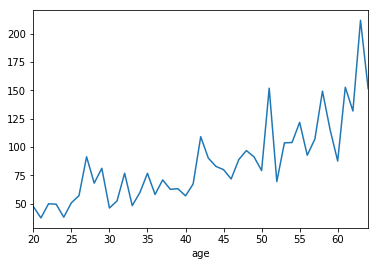

In [28]:
madad.plot()

```Save the result as a csv```

In [29]:
madad.to_csv()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


'20,47.30141094253252\n21,37.2526553489853\n22,49.75068201843673\n23,49.37711334563856\n24,37.88302683437904\n25,50.64177339314836\n26,56.91165869304089\n27,91.3121579595761\n28,68.00186222958537\n29,81.13255969781505\n30,45.99789749814787\n31,52.297819577454206\n32,76.76829443581528\n33,48.13249653063161\n34,59.580085239975425\n35,76.67231395725233\n36,58.002991882372534\n37,70.87032555038908\n38,62.552878903959005\n39,63.083778649704556\n40,56.77967417633824\n41,67.2111359912377\n42,109.09902744766741\n43,90.12507707016438\n44,82.81612826819834\n45,79.93287377373049\n46,71.69602695429565\n47,88.81038088099211\n48,96.80035793534442\n49,91.28376421858306\n50,79.13346028175273\n51,151.9879149764415\n52,69.41323394119901\n53,103.64041680013612\n54,103.92029084520458\n55,121.75387950820411\n56,92.68155346861144\n57,106.92399499426094\n58,149.34044788996812\n59,115.32709754351586\n60,87.53423366899781\n61,152.83952905922163\n62,131.8206694308981\n63,212.06909527576587\n64,151.6156367668222

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=50

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

1872
122000
10516.828082191782
9478.5
True     770
False    690
Name: Fireplaces, dtype: int64
288138.5714285714
Fireplaces
0    141331.482609
1    211843.909231
2    240588.539130
3    252000.000000
Name: SalePrice, dtype: float64
Fireplaces
0    54.781159
1    39.150769
2    54.347826
3    38.400000
Name: YearBuilt, dtype: float64


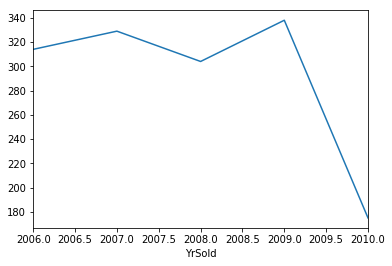

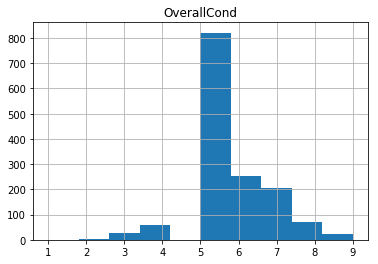

In [32]:
print(np.min(df["YearBuilt"]))
a=df.groupby(df["YearBuilt"])
print(np.max(a.get_group(1872)["SalePrice"]))
print(df["LotArea"].mean())
print(df["LotArea"].median())
a= df['Fireplaces'] != 0
print(a.value_counts())
a=df.groupby(df["PoolArea"]>0)
print(np.mean(a.get_group(True)["SalePrice"]))
a=df.groupby(df["YrSold"])
a.size().plot()
hist=df.hist(column="OverallCond", by=None)
a=df.groupby(df['Fireplaces'])
print(a['SalePrice'].mean())
print(2019-a['YearBuilt'].mean())



## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df['LotAreaMeters']=0.092903*df['LotArea']
df['1+2']=df['1stFlrSF']+df['2ndFlrSF']
df['Glength']=df['GarageArea']**0.5
df['lot1']=df['LotArea']/(df['BedroomAbvGr']+1)
df['lot2']=df['LotArea']/(df['BedroomAbvGr']+1)
a=df.groupby(df["YearBuilt"])
df['lot2']=df['LotArea']/(a.mean()+0.0001)
df['ranking']= df['LotArea'].rank(ascending=False)
l=['LotAreaMeters','1+2','Glength','lot1','lot2','ranking']


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [36]:
Y=df['SalePrice']/np.max(df['SalePrice'])
X_train, X_test, Y_train, Y_test = train_test_split (df, Y, test_size=0.2)
reg = LinearRegression(normalize=True).fit(X_train, Y_train)

print(reg.score(X_test,Y_test))

print(mean_squared_error(Y_train,reg.predict(X_train)))

print(mean_squared_error(Y_test,reg.predict(X_test)))


ValueError: ignored

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:
#I did not have time to do this part